# Data Visualization Code-Along - Using Matplotlib and Seaborn

### Imports and Data

In [1]:
# Data manipulation
import pandas as pd

# Math
import numpy as np
# Set seed for reproducability
np.random.seed(2019)

# Data visualization - helps customize plots
import matplotlib.pyplot as plt
# Setting our matplotlib settings
%matplotlib inline 

# Prettier data visualization
import seaborn as sns
# Setting a default style for our seaborn plots
sns.set(style = 'darkgrid')

In [3]:
import pre_process_animal_shelter_data

In [2]:
# Before reading in a csv file, we can check what's in our current directory
!ls

Clean-Austin_Animal_Center_Intakes.csv
README.md
Visualization-Practice_Matplotlib-and-Seaborn.ipynb
barplot-vs-histogram.png
pre_process_animal_shelter_data.py


In [4]:
# Reading in our csv
df = pd.read_csv("Clean-Austin_Animal_Center_Intakes.csv")

In [5]:
# Examining our csv
df.head()

,animal_id,DateTime_intake,Found Location,Intake Type,Intake Condition,Animal Type_intake,Age upon Intake,year,month_intake,day_intake,...,Date of Birth,Outcome Type,Animal Type_outcome,Sex upon Outcome,Age upon Outcome,Breed,Color,month_outcome,day_outcome,days_in_shelter
0,A792908,2019-04-16,10505 S Ih 35 in Austin (TX),Public Assist,Normal,Other,1 year,2019,4,16,...,04/16/2018,Euthanasia,Other,Unknown,1 year,Bat Mix,Brown,4.0,17.0,1
1,A488234,2019-04-16,Clear Veiw in Travis (TX),Public Assist,Normal,Dog,13 years,2019,4,16,...,10/02/2005,Return to Owner,Dog,Neutered Male,13 years,German Shepherd/Labrador Retriever,Brown/Black,4.0,24.0,8
2,A792904,2019-04-16,9808 Crownridge in Austin (TX),Stray,Normal,Dog,4 months,2019,4,16,...,11/16/2018,Transfer,Dog,Neutered Male,5 months,Pointer Mix,Black/White,4.0,24.0,8
3,A792902,2019-04-16,2412 Bitter Creek in Austin (TX),Stray,Normal,Cat,1 week,2019,4,16,...,04/09/2019,Transfer,Cat,Unknown,1 weeks,Domestic Shorthair Mix,Buff,4.0,18.0,2
4,A792899,2019-04-16,2412 Bitter Creek in Austin (TX),Stray,Normal,Cat,1 week,2019,4,16,...,04/09/2019,Transfer,Cat,Unknown,1 weeks,Domestic Shorthair Mix,Orange Tabby,4.0,18.0,2


In [6]:
# More examining
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86764 entries, 0 to 86763
Data columns (total 22 columns):
animal_id              86764 non-null object
DateTime_intake        86764 non-null object
Found Location         86764 non-null object
Intake Type            86764 non-null object
Intake Condition       86764 non-null object
Animal Type_intake     86764 non-null object
Age upon Intake        86764 non-null object
year                   86764 non-null int64
month_intake           86764 non-null int64
day_intake             86764 non-null int64
Name                   65599 non-null object
DateTime_outcome       86764 non-null object
Date of Birth          86764 non-null object
Outcome Type           86761 non-null object
Animal Type_outcome    86764 non-null object
Sex upon Outcome       86762 non-null object
Age upon Outcome       86763 non-null object
Breed                  86764 non-null object
Color                  86764 non-null object
month_outcome          86764 non-null f

In [7]:
# Still more examining
df.describe()

,year,month_intake,day_intake,month_outcome,day_outcome,days_in_shelter
count,86764.000000,86764.000000,86764.000000,86764.000000,86764.000000,86764.000000
mean,2016.029817,6.257180,15.389459,6.935872,16.077279,21.336303
std,1.615893,3.291534,8.735011,3.307431,8.723639,36.933167
min,2013.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2015.000000,3.000000,8.000000,4.000000,9.000000,4.000000
50%,2016.000000,6.000000,15.000000,7.000000,16.000000,7.000000
75%,2017.000000,9.000000,23.000000,10.000000,24.000000,22.000000
max,2019.000000,12.000000,31.000000,12.000000,31.000000,356.000000


### [Barplots:](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.bar.html)

Barplots are used for displaying one dimensional, discrete data. 

"One axis of a bar graph features the categories being compared, while the other axis represents the value of each. The length of each bar is proportionate to the value it represents." [(source)](https://visme.co/blog/types-of-graphs/#i7IKQBydAHvVADcl.99)

Call plt.bar with at least two arguments:

- x: a list of categories
- height: a value for each category

#### Task 1:
Create a bar chart showing the number of days in shelter for five named dogs.

In [11]:
# Step one: grab all dogs
dog_df = df.loc[df["Animal Type_outcome"] == 'Dog']

In [14]:
dog_df.head()

,animal_id,DateTime_intake,Found Location,Intake Type,Intake Condition,Animal Type_intake,Age upon Intake,year,month_intake,day_intake,...,Date of Birth,Outcome Type,Animal Type_outcome,Sex upon Outcome,Age upon Outcome,Breed,Color,month_outcome,day_outcome,days_in_shelter
1,A488234,2019-04-16,Clear Veiw in Travis (TX),Public Assist,Normal,Dog,13 years,2019,4,16,...,10/02/2005,Return to Owner,Dog,Neutered Male,13 years,German Shepherd/Labrador Retriever,Brown/Black,4.0,24.0,8
2,A792904,2019-04-16,9808 Crownridge in Austin (TX),Stray,Normal,Dog,4 months,2019,4,16,...,11/16/2018,Transfer,Dog,Neutered Male,5 months,Pointer Mix,Black/White,4.0,24.0,8
10,A792900,2019-04-16,Payton Falls Drive in Austin (TX),Stray,Normal,Dog,2 months,2019,4,16,...,02/10/2019,Adoption,Dog,Neutered Male,2 months,Anatol Shepherd Mix,White/Brown,4.0,26.0,10
11,A792900,2019-04-16,Payton Falls Drive in Austin (TX),Stray,Normal,Dog,2 months,2019,4,16,...,02/10/2019,Adoption,Dog,Neutered Male,2 months,Anatol Shepherd Mix,White/Brown,4.0,21.0,5
12,A790139,2019-04-16,Austin (TX),Owner Surrender,Normal,Dog,2 months,2019,4,16,...,02/13/2019,Adoption,Dog,Neutered Male,2 months,German Shepherd/Great Pyrenees,Black,4.0,17.0,1


In [22]:
# Step two: grab all named dogs
# named_dogs = dog_df.loc[dog_df["Name"].isna() == False]

named_dogs = dog_df.loc[dog_df["Name"].notnull()]

In [23]:
named_dogs.isna().sum()

animal_id              0
DateTime_intake        0
Found Location         0
Intake Type            0
Intake Condition       0
Animal Type_intake     0
Age upon Intake        0
year                   0
month_intake           0
day_intake             0
Name                   0
DateTime_outcome       0
Date of Birth          0
Outcome Type           1
Animal Type_outcome    0
Sex upon Outcome       2
Age upon Outcome       1
Breed                  0
Color                  0
month_outcome          0
day_outcome            0
days_in_shelter        0
dtype: int64

In [24]:
# Step three: grab five
sample_named_dogs = named_dogs.sample(n=5)

In [59]:
# Set your x and y axes/variables
x = sample_named_dogs["Name"]
y = sample_named_dogs["days_in_shelter"]


average_days_for_sample = y.mean()
average_days_for_population = named_dogs["days_in_shelter"].mean()

In [60]:
average_days_for_sample

19.4

In [61]:
average_days_for_population

23.788662270166398

<BarContainer object of 5 artists>

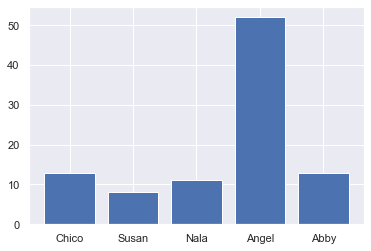

In [33]:
# Make a bar plot!
plt.bar(x, y)

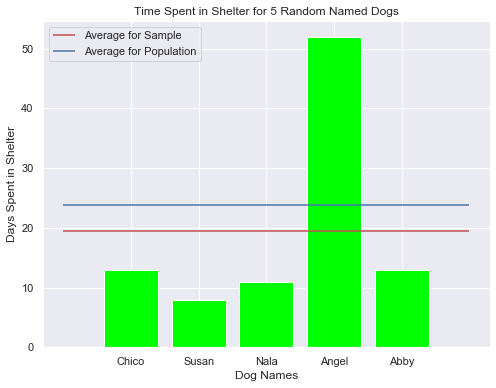

In [63]:
# Okay, now improve/prettify your bar plot. Titles, labels, etc.

plt.figure(figsize=(8,6))

plt.bar(x, y, color = "#00FF00")
plt.hlines(average_days_for_sample, -1, 5, color = "r",
           label="Average for Sample")
plt.hlines(average_days_for_population, -1, 5, color = "b",
           label="Average for Population")

plt.title("Time Spent in Shelter for 5 Random Named Dogs")
plt.xlabel("Dog Names")
plt.ylabel("Days Spent in Shelter")
plt.legend()

plt.show()

So what? What does this show you? What kind of information can you glean from a bar graph?

### [Histograms:](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.hist.html)

Histograms are like barplots in the sense that they describe one-dimensional data. However, a histogram divides the data into bins, counts the number of observations in each bin, and shows the bins on the x-axis and the frequency on the y-axis. It is used for visualizing continuous variables. 

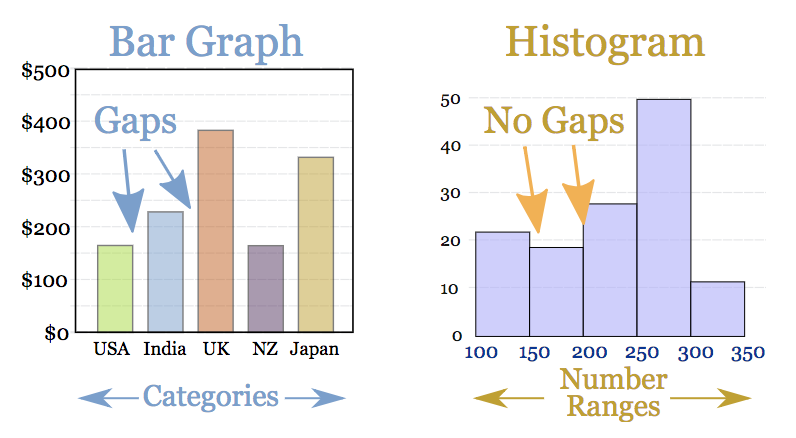

Call plt.hist with at least one argument:

- x: the input/variable to be counted

#### Task 2: 
Create a histogram showing how many days that dogs spend in shelter.

In [65]:
# Make sure you have your dog data, or grab that now
dog_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53746 entries, 1 to 86762
Data columns (total 22 columns):
animal_id              53746 non-null object
DateTime_intake        53746 non-null object
Found Location         53746 non-null object
Intake Type            53746 non-null object
Intake Condition       53746 non-null object
Animal Type_intake     53746 non-null object
Age upon Intake        53746 non-null object
year                   53746 non-null int64
month_intake           53746 non-null int64
day_intake             53746 non-null int64
Name                   45794 non-null object
DateTime_outcome       53746 non-null object
Date of Birth          53746 non-null object
Outcome Type           53745 non-null object
Animal Type_outcome    53746 non-null object
Sex upon Outcome       53744 non-null object
Age upon Outcome       53745 non-null object
Breed                  53746 non-null object
Color                  53746 non-null object
month_outcome          53746 non-null f

In [66]:
# Define your input variable
x_hist = dog_df["days_in_shelter"]

In [82]:
x_hist.value_counts().index.sort_values()

Int64Index([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,
            ...
            333, 336, 337, 338, 339, 340, 345, 347, 352, 356],
           dtype='int64', length=337)

(array([4.5517e+04, 4.0450e+03, 1.7170e+03, 9.6300e+02, 5.8400e+02,
        3.8800e+02, 2.4400e+02, 1.5200e+02, 9.8000e+01, 3.8000e+01]),
 array([  1. ,  36.5,  72. , 107.5, 143. , 178.5, 214. , 249.5, 285. ,
        320.5, 356. ]),
 <a list of 10 Patch objects>)

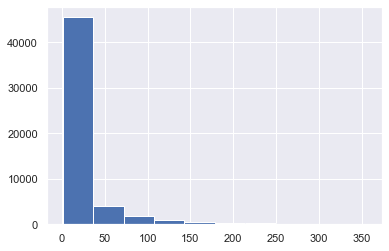

In [68]:
# Let's go ahead and throw that into a histogram!
plt.hist(x_hist)

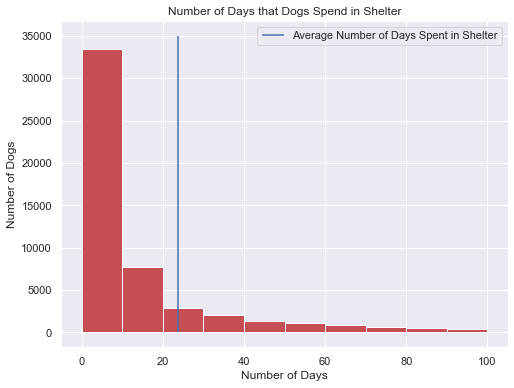

In [90]:
# Interpret that histogram by adding a title and x/y labels
# Change around the number of bins, too - how does that change perspective?

plt.figure(figsize=(8,6))

plt.hist(x_hist, bins=10, range=(0,100), color = "r")
plt.vlines(average_days_for_population, -1, 35000, color = "b",
           label="Average Number of Days Spent in Shelter")

plt.title("Number of Days that Dogs Spend in Shelter")
plt.xlabel("Number of Days")
plt.ylabel("Number of Dogs")

plt.legend()
plt.show()

Again, so what? What does this tell you?

Compare to a normal random distribution (https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.random.randn.html)

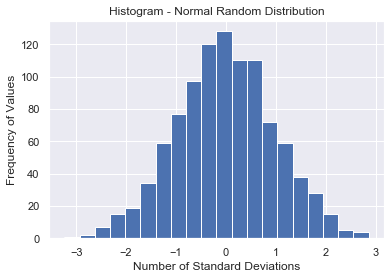

In [91]:
# Generate 1000 values
x = np.random.randn(1000)

# Plot the histogram
plt.hist(x, bins=20)

# Labels
plt.xlabel('Number of Standard Deviations')
plt.ylabel('Frequency of Values')
plt.title('Histogram - Normal Random Distribution')

plt.show()

### [Scatterplot:](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.scatter.html)

Scatterplots visualize two dimensional data (observations with two variables). It allows us to examine the relationship between two variables.

Call plt.scatter with at least two arguments:

- x: first variable
- y: second variable

#### Task 3:
Create a scatter plot to compare the age of a dog, in days, to the number of days spent in shelter.

In [119]:
dog_df.columns

Index(['animal_id', 'DateTime_intake', 'Found Location', 'Intake Type',
       'Intake Condition', 'Animal Type_intake', 'Age upon Intake', 'year',
       'month_intake', 'day_intake', 'Name', 'DateTime_outcome',
       'Date of Birth', 'Outcome Type', 'Animal Type_outcome',
       'Sex upon Outcome', 'Age upon Outcome', 'Breed', 'Color',
       'month_outcome', 'day_outcome', 'days_in_shelter'],
      dtype='object')

In [98]:
dog_df["DateTime_outcome"] = pd.to_datetime(dog_df["DateTime_outcome"])

/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [99]:
dog_df["DateTime_outcome"]

1       2019-04-24
2       2019-04-24
10      2019-04-26
11      2019-04-21
12      2019-04-17
           ...    
86758   2013-10-19
86759   2013-10-18
86760   2013-12-31
86761   2013-10-05
86762   2013-10-24
Name: DateTime_outcome, Length: 53746, dtype: datetime64[ns]

In [100]:
dog_df["Date of Birth"] = pd.to_datetime(dog_df["Date of Birth"])

/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [101]:
dog_df["Date of Birth"]

1       2005-10-02
2       2018-11-16
10      2019-02-10
11      2019-02-10
12      2019-02-13
           ...    
86758   2011-10-01
86759   2008-10-01
86760   2007-04-13
86761   2012-04-01
86762   2009-10-01
Name: Date of Birth, Length: 53746, dtype: datetime64[ns]

In [92]:
# Need to do some data wrangling to get there! Look at "Age upon Outcome", why
# is that harder to use than calculating an age in days?
dog_df["Age upon Outcome"]

1        13 years
2        5 months
10       2 months
11       2 months
12       2 months
           ...   
86758     2 years
86759     5 years
86760     6 years
86761      1 year
86762     4 years
Name: Age upon Outcome, Length: 53746, dtype: object

In [118]:
dog_df["DateTime_outcome"][1].year

2019

In [120]:
# Get age in days
dog_df["age in days"] = dog_df["DateTime_outcome"] - dog_df["Date of Birth"]

/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [132]:
dog_df["age in days"] = dog_df["age in days"] / np.timedelta64(1, 'D')

/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


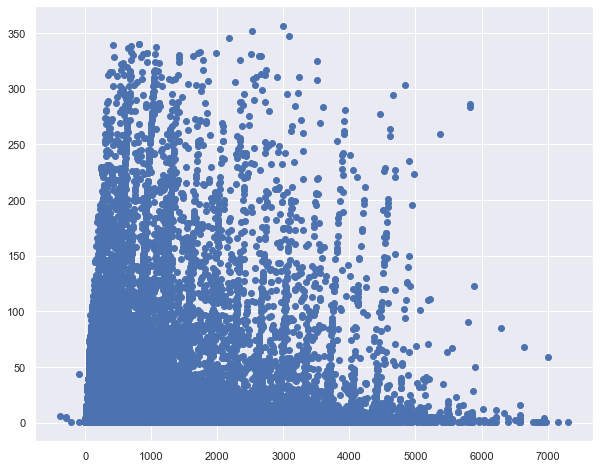

In [137]:
# Plot your scatterplot! Anything wrong with this? See anything weird?
x = dog_df["age in days"]
y = dog_df["days_in_shelter"]

plt.figure(figsize=(10,8))
plt.scatter(x,y)
plt.show()

Why was it useful to do a scatterplot in this instance? What other uses can you think of for using a scatterplot?

### And now, [Seaborn:](https://seaborn.pydata.org/)

#### Task 4:
Create a pairplot to examine our variables.

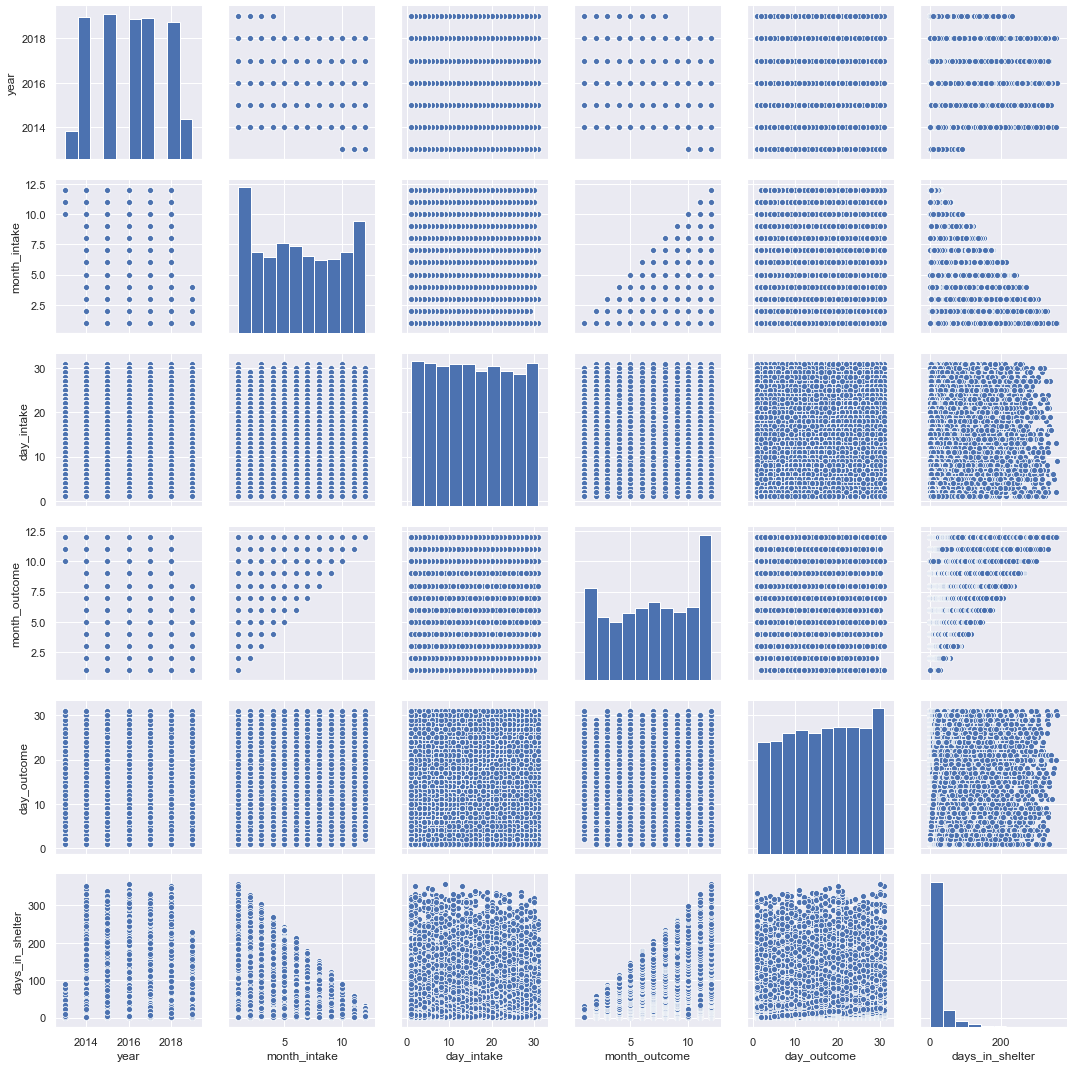

In [138]:
# Apply a basic pairplot
sns.pairplot(df)

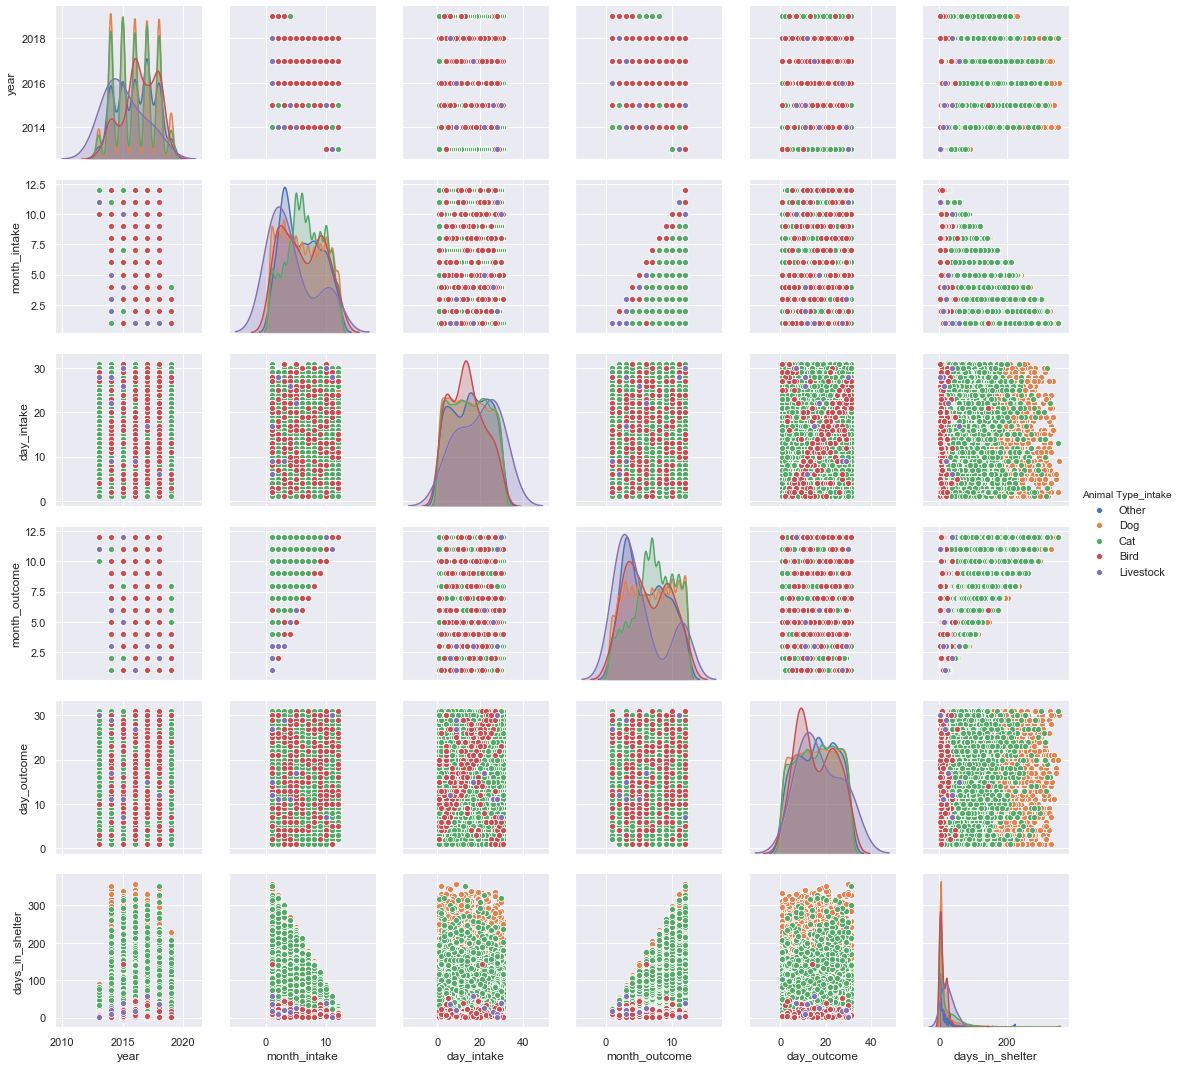

In [139]:
# Now use the hue argument
sns.pairplot(df, hue="Animal Type_intake")

What is a pairplot doing? Why is it useful, and when would it not be useful? What isn't in this plot?

### Sources!

Types of plots: some comparisons and descriptions from [visme.co](https://visme.co/blog/types-of-graphs/)

### Further reading 

- When to use pairplots, and how to make them more useful: [Towards Data Science](https://towardsdatascience.com/visualizing-data-with-pair-plots-in-python-f228cf529166)
- The ultimate Seaborn tutorial (cannot recommend this enough): [Elite Data Science](https://elitedatascience.com/python-seaborn-tutorial)
- Understanding the SettingWithCopyWarning: [Dataquest](https://www.dataquest.io/blog/settingwithcopywarning/)